In [12]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [13]:
os.chdir("D:/Algorithmic-Fairness-Interpretability/afi_final_project")

In [14]:
data = pd.read_excel("data/dataproject2024.xlsx")

In [15]:
df = pd.DataFrame(data)

In [16]:
X = df[
    [
        "Job tenure",
        "Age",
        "Car price",
        "Funding amount",
        "Down payment",
        "Loan duration",
        "Monthly payment",
        "Credit event",
        "Married",
        "Homeowner",
    ]
]
y = df["PD"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [18]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred_linear = linear_model.predict(X_test)

In [20]:
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

In [21]:
print("Mean Squared Error for Linear Regression:", mse_linear)
print("Mean Absolute Error for Linear Regression:", mae_linear)
print("Root Mean Squared Error for Linear Regression:", r2_linear)
print("Coefficients from Linear Regression:", linear_model.coef_)

Mean Squared Error for Linear Regression: 0.025293393693871583
Mean Absolute Error for Linear Regression: 0.12064726405671973
Root Mean Squared Error for Linear Regression: 0.42325844480117025
Coefficients from Linear Regression: [-2.95270984e-03 -1.26946613e-03 -2.12345492e-05  2.59022962e-05
  8.19682674e-02  1.14162934e-03  2.91973922e-01  3.15470946e-01
 -7.28916966e-02 -6.47144847e-02]


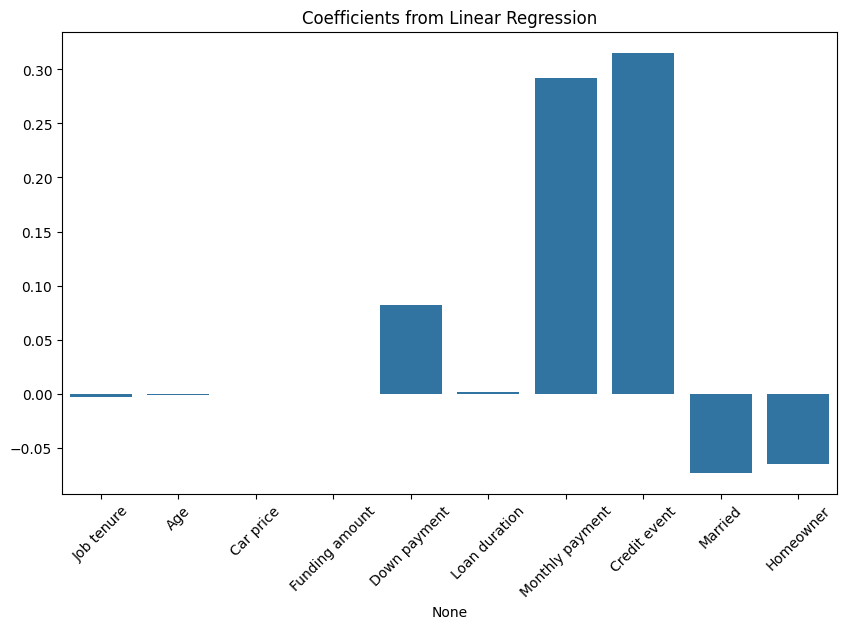

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x=X.columns, y=linear_model.coef_)
plt.title("Coefficients from Linear Regression")
plt.xticks(rotation=45)
plt.show()

- A feature with a positive coefficient has a direct relationship with the target (PD). This means that as the value of this feature increases, the predicted PD increases.
- A feature with a negative coefficient has an inverse relationship with the target. This means that as the feature increases, the predicted PD decreases.

### Key observations:

- **Monthly payment** and **Credit event** have the largest positive coefficients:
These two features have the most substantial positive impact on the probability of default. As these values increase, the probability of default increases significantly.

- **Married** and **Homeowner** have negative coefficients:
Being married or a homeowner reduces the predicted probability of default, as indicated by the negative coefficients.

- **Down payment** has positive coefficients:
These features also increase the probability of default, though their influence is smaller compared to "Monthly payment" and "Credit event."

- **Job tenure**, **Loan duration**, and **Age** have near-zero coefficients:
These features have very little or no effect on the predicted probability of default. This suggests that, according to the linear regression model, variations in these features do not significantly influence the likelihood of default.

### Interpretation:
- **Credit event**: The most important feature. If the person had past credit events (like defaults or bankruptcies), it strongly increases the likelihood of default.
- **Monthly payment**: The second most important feature in predicting default probability. Higher monthly payments likely indicate more financial strain, increasing the risk of default.
- **Married and Homeowner**: These characteristics reduce the likelihood of default, potentially because they signify more financial stability.
Job tenure and Age: These features don't seem to have a significant impact on the prediction of default probability in this model, meaning the model doesn't find these factors important in predicting PD.

Overall, the plot reveals which features the model considers most relevant in predicting the probability of default (PD). The highest positive bars indicate features that increase the risk of default, while negative bars (such as "Married" and "Homeowner") show features that decrease the risk.